In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('sales.csv')
data.head()

,Date,Amount
0,1/1/2000,510
1,2/1/2000,515
2,3/1/2000,530
3,4/1/2000,527
4,5/1/2000,519


In [4]:
data.tail()

,Date,Amount
103,8/1/2008,766
104,9/1/2008,703
105,10/1/2008,644
106,11/1/2008,604
107,12/1/2008,630


In [5]:
data['Date'] = pd.to_datetime(data['Date']) # formatting date .

In [6]:
data.tail()

,Date,Amount
103,2008-08-01,766
104,2008-09-01,703
105,2008-10-01,644
106,2008-11-01,604
107,2008-12-01,630


In [7]:
data.set_index('Date',inplace=True)

In [8]:
data # Now date has been converted into index

,Amount
Date,
2000-01-01,510
2000-02-01,515
2000-03-01,530
2000-04-01,527
2000-05-01,519
...,...
2008-08-01,766
2008-09-01,703
2008-10-01,644


<Axes: xlabel='Date'>

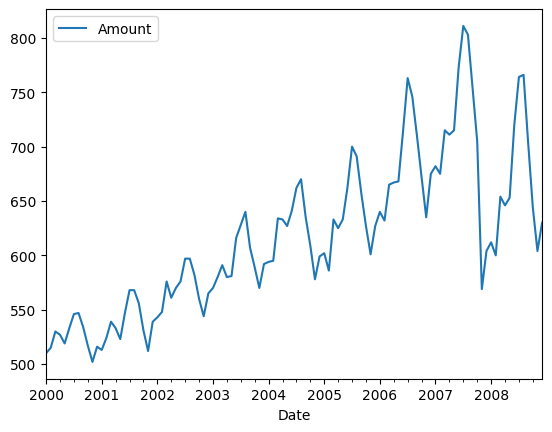

In [9]:
data.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller # Augmented Dickey fuller test.

In [12]:
def adf_test(d):
    result=adfuller(d)
    print('P value ->',result[1])
    if result[1]<=0.5:
        print("Reject the null hypothesis.Data is stationary.")
    else:
        print("Accept the null hypothesis,Data is not stationary")

In [13]:
adf_test(data['Amount']) # calling the above function.

P value -> 0.5644352099925031
Accept the null hypothesis,Data is not stationary


In [14]:
data['First Difference'] = data['Amount'] - data['Amount'].shift(1) # Creating a new column First difference.

In [15]:
data.head()

,Amount,First Difference
Date,,
2000-01-01,510,NaN
2000-02-01,515,5.0
2000-03-01,530,15.0
2000-04-01,527,-3.0
2000-05-01,519,-8.0


In [20]:
adf_test(data['First Difference'].dropna()) #Accept status should be there

P value -> 0.07478507605167106
Reject the null hypothesis.Data is stationary.


In [21]:
data['Second difference'] =data['First Difference']-data['First Difference'].shift(1)

In [18]:
data.head()

,Amount,First Difference,Second difference
Date,,,
2000-01-01,510,NaN,NaN
2000-02-01,515,5.0,NaN
2000-03-01,530,15.0,10.0
2000-04-01,527,-3.0,-18.0
2000-05-01,519,-8.0,-5.0


In [19]:
adf_test(data['Second difference'].dropna()) # the value is less then the data is stationary.

P value -> 3.4877399176947936e-15
Reject the null hypothesis.Data is stationary.


From above we conclude that the second difference data is stationary.

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

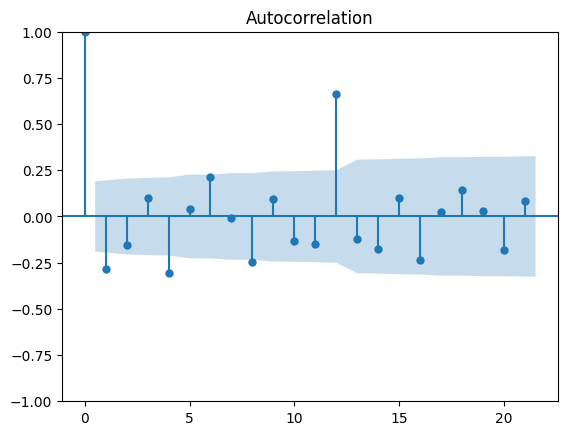

In [23]:
plot1 = plot_acf(data["Second difference"].dropna()) # Plotting ACF ACF - GIVES VALUE OF Q (We will not count the first upper trend value because it not under the threshold range)

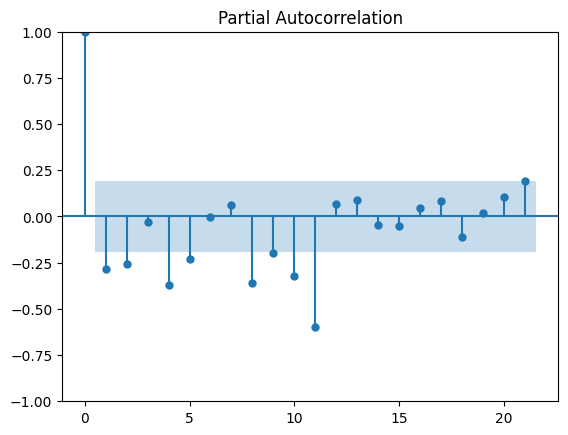

In [25]:
# Plotting PACF -
plot2 = plot_pacf(data["Second difference"].dropna()) # PACF GIVES VALUE OF P

In [26]:
data['Seasonal Difference'] = data['Amount']-data['Amount'].shift(12) # We are taking data on yearly basis because we have used 12 months shift
# to see the trends on the yearly basis and to see the seasonal data we must put the shift of 12.

In [27]:
data

,Amount,First Difference,Second difference,Seasonal Difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


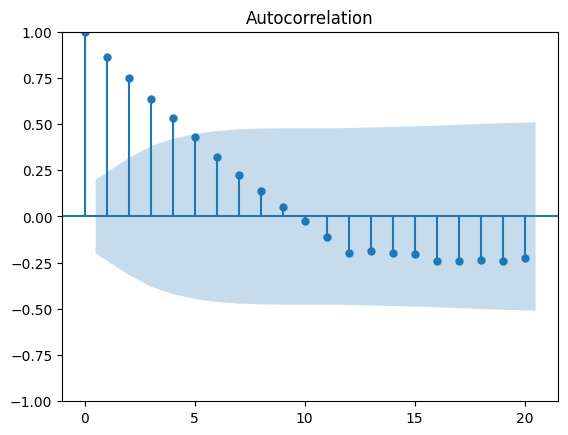

In [28]:
plot3 = plot_acf(data["Seasonal Difference"].dropna())

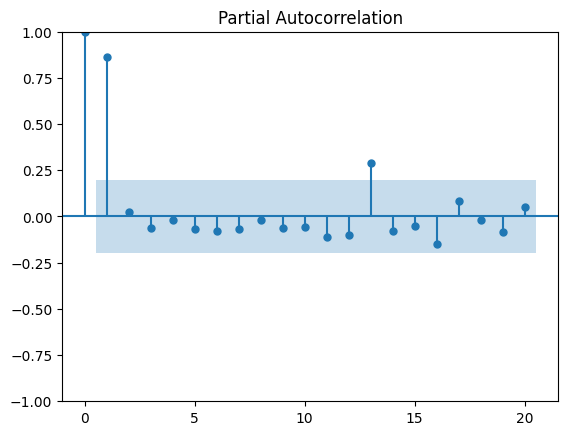

In [29]:
plot4 = plot_pacf(data["Seasonal Difference"].dropna())

In [30]:
# Important tasks begins - Arima and Sarima -
from datetime import datetime

In [31]:
train_data = data # Made a copy of original data and named the copy of original data train_data

In [32]:
train_data

,Amount,First Difference,Second difference,Seasonal Difference
Date,,,,
2000-01-01,510,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN
2000-03-01,530,15.0,10.0,NaN
2000-04-01,527,-3.0,-18.0,NaN
2000-05-01,519,-8.0,-5.0,NaN
...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0
2008-09-01,703,-63.0,-65.0,-51.0
2008-10-01,644,-59.0,4.0,-61.0


In [33]:
from statsmodels.tsa.arima.model import ARIMA # initalizing the arima model
modela = ARIMA(train_data['Amount'],order=(17,2,3)) # order is the triplets (p,d,q)
arima_modal = modela.fit()

In [34]:
predicteda = arima_modal.predict(start=datetime(2003,1,1),end=datetime(2008,12,1))

In [35]:
train_data['Predicted_arima']=predicteda # Now inserted a new column in the dataset named Predicted_arima

In [36]:
train_data

,Amount,First Difference,Second difference,Seasonal Difference,Predicted_arima
Date,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077705
2008-09-01,703,-63.0,-65.0,-51.0,736.171481
2008-10-01,644,-59.0,4.0,-61.0,649.999105


The remaining NaN values are shown because the start date we have mention is different.

<Axes: xlabel='Date'>

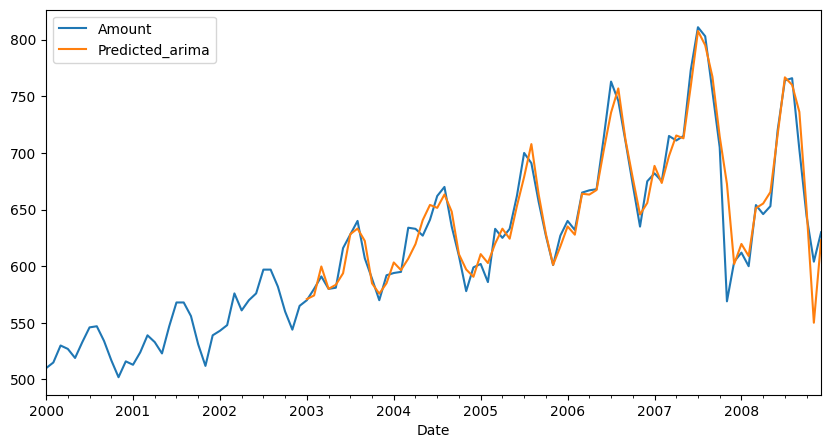

In [37]:
train_data[['Amount','Predicted_arima']].plot(figsize=(10,5))

Arima is the most tds model, it is difficult to train arima

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # it is used to forecast seasonal data

In [39]:
smodel = SARIMAX(train_data['Amount'],order=(2,0,4),seasonal_order=(0,1,0,12)) # seasonality depends on montly or yearly

In [41]:
model = smodel.fit()

In [42]:
model

In [44]:
predicted = model.predict(start=datetime(2003,1,1),end=datetime(2008,12,1))

In [45]:
train_data['Predicted']=predicted

In [46]:
train_data

,Amount,First Difference,Second difference,Seasonal Difference,Predicted_arima,Predicted
Date,,,,,,
2000-01-01,510,NaN,NaN,NaN,NaN,NaN
2000-02-01,515,5.0,NaN,NaN,NaN,NaN
2000-03-01,530,15.0,10.0,NaN,NaN,NaN
2000-04-01,527,-3.0,-18.0,NaN,NaN,NaN
2000-05-01,519,-8.0,-5.0,NaN,NaN,NaN
...,...,...,...,...,...,...
2008-08-01,766,2.0,-42.0,-37.0,760.077705,763.089154
2008-09-01,703,-63.0,-65.0,-51.0,736.171481,722.759872
2008-10-01,644,-59.0,4.0,-61.0,649.999105,664.085837


<Axes: xlabel='Date'>

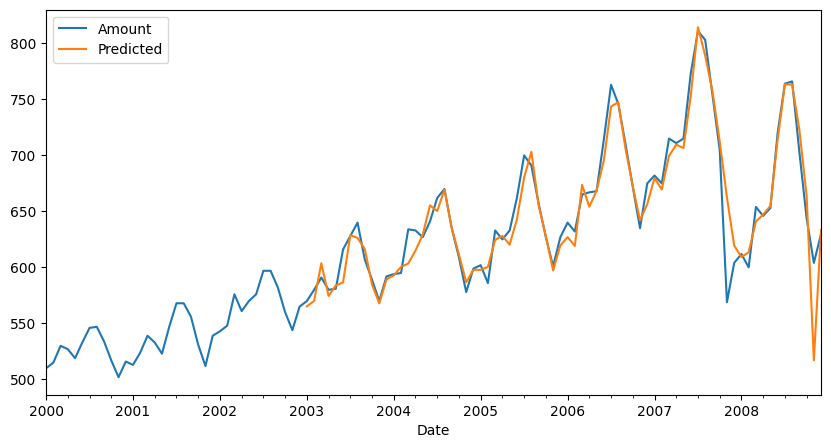

In [47]:
train_data[['Amount','Predicted']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

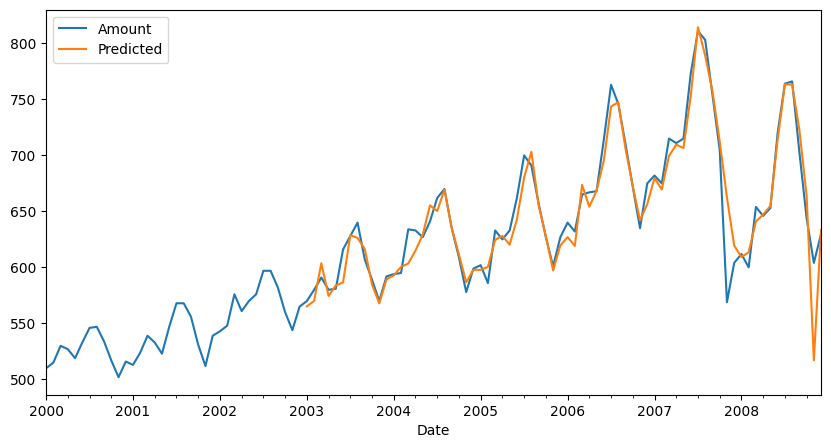

In [48]:
train_data[['Amount','Predicted']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

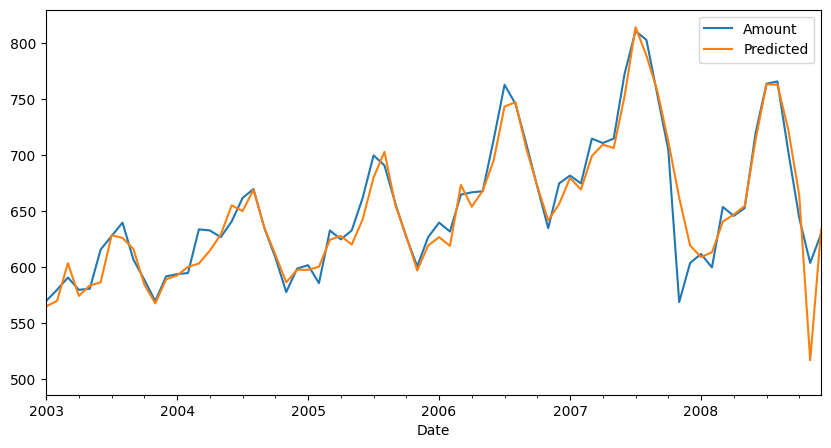

In [49]:
train_data[['Amount','Predicted']].plot(xlim=['2003-01-01','2008-12-01'],figsize=(10,5))

Now to make forecasting for future year now we make predictions - 

2003-01-01    565.231163
2003-02-01    570.077744
2003-03-01    603.789256
2003-04-01    574.529784
2003-05-01    583.856165
                 ...    
2008-08-01    763.089154
2008-09-01    722.759872
2008-10-01    664.085837
2008-11-01    517.159341
2008-12-01    633.590323
Freq: MS, Name: predicted_mean, Length: 72, dtype: float64

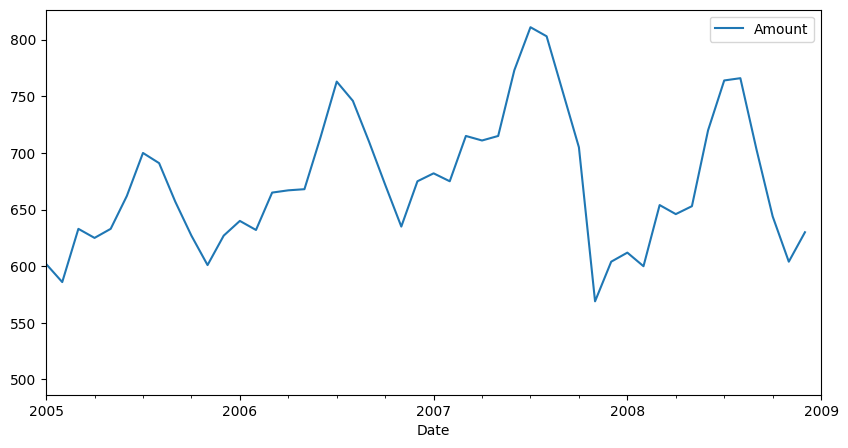

In [50]:
predicted1 = model.predict(start=datetime(2009,1,1),end=datetime(2009,12,1))
train_data['Predicted1']=predicted1
train_data[['Amount']].plot(xlim=['2005-01-01','2009-01-01'],figsize=(10,5))
predicted

<Axes: >

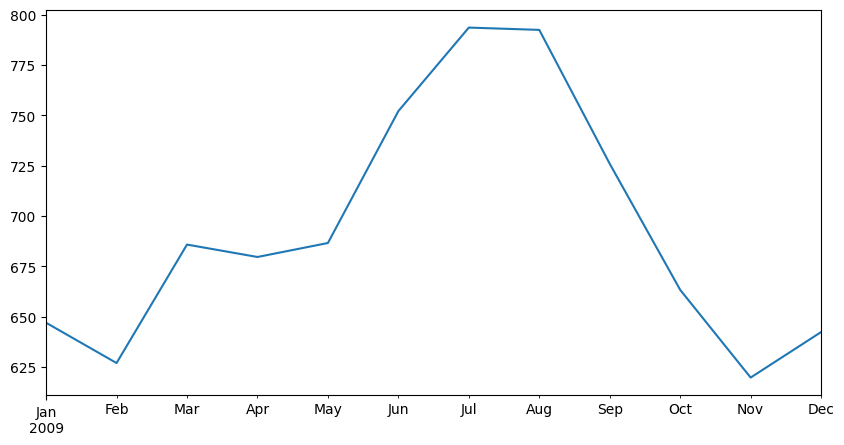

In [51]:
predicted1.plot(figsize=(10,5))

In [52]:
# now to deploy it on fastapi
import pickle
pickle.dump(model,open('tsmodel.pkl','wb'))

In [53]:
model2 = pickle.load(open('tsmodel.pkl','rb'))

In [54]:
model2.predict(start=datetime(2009,1,1),end=datetime(2009,12,1))

2009-01-01    646.927698
2009-02-01    626.915514
2009-03-01    685.770019
2009-04-01    679.601790
2009-05-01    686.549380
2009-06-01    752.073197
2009-07-01    793.582656
2009-08-01    792.431051
2009-09-01    725.914075
2009-10-01    663.271163
2009-11-01    619.688918
2009-12-01    642.305975
Freq: MS, Name: predicted_mean, dtype: float64

In [55]:
model2.predict(datetime(2009,1,1))

2009-01-01    646.927698
Freq: MS, dtype: float64

In [56]:
# arima should be apply on arima and sarimax should perform to seasonal data